**Install the Skyfield library**

In [1]:
!pip install skyfield

In [2]:
# import required libraries
from skyfield.api import Topos, load, Star
from skyfield.data import hipparcos
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load required data
ts = load.timescale()
planets = load('de421.bsp')
earth = planets['earth']

This downloads planetary data for accurate Earth positioning.

**Input Observer's Location**

In [4]:
# Get user input for location
print("Enter your location details:")
latitude = float(input("Latitude (in degrees): "))   #19.8206
longitude = float(input("Longitude (in degrees): "))  #155.4681
observer = earth + Topos(latitude_degrees=latitude, longitude_degrees=longitude)

Enter your location details:
Latitude (in degrees): 19.8206
Longitude (in degrees): 155.4681


I'm using Mauna Kea in Hawaii because its one of the darkest places best for stargazing.

In [5]:
# Get the current time
current_time = datetime.utcnow()
t = ts.utc(current_time.year, current_time.month, current_time.day,
           current_time.hour, current_time.minute, current_time.second)

**Load the Hipparcos star catalog**

- It's a catalog for star positions.

In [6]:
# Load the Hipparcos star catalog
with load.open(hipparcos.URL) as f:
    df_stars = hipparcos.load_dataframe(f)

In [7]:
df_stars.head()

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25


In [8]:
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118218 entries, 1 to 118322
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   magnitude         118217 non-null  float64
 1   ra_degrees        117955 non-null  float64
 2   dec_degrees       117955 non-null  float64
 3   parallax_mas      117955 non-null  float64
 4   ra_mas_per_year   117955 non-null  float64
 5   dec_mas_per_year  117955 non-null  float64
 6   ra_hours          117955 non-null  float64
 7   epoch_year        118218 non-null  float64
dtypes: float64(8)
memory usage: 8.1 MB


**Check for missing values**

In [9]:
df_stars.isnull().sum()

,0
magnitude,1
ra_degrees,263
dec_degrees,263
parallax_mas,263
ra_mas_per_year,263
dec_mas_per_year,263
ra_hours,263
epoch_year,0


**Drop missing values**

In [10]:
df_stars.dropna(inplace=True)
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117955 entries, 1 to 118322
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   magnitude         117955 non-null  float64
 1   ra_degrees        117955 non-null  float64
 2   dec_degrees       117955 non-null  float64
 3   parallax_mas      117955 non-null  float64
 4   ra_mas_per_year   117955 non-null  float64
 5   dec_mas_per_year  117955 non-null  float64
 6   ra_hours          117955 non-null  float64
 7   epoch_year        117955 non-null  float64
dtypes: float64(8)
memory usage: 8.1 MB


In [11]:
# Convert df to Star objects
stars = []
for index, row in df_stars.iterrows():
    # Right ascension in hours
    ra_hours = row['ra_hours']
    # Declination in degrees
    dec_degrees = row['dec_degrees']
    star = Star(ra_hours=ra_hours, dec_degrees=dec_degrees)
    stars.append(star)

stars

[Star(ra=0.0009118500000000001, dec=1.08901332, epoch=2451545.0),
 Star(ra=0.00379737, dec=-19.49883745, epoch=2451545.0),
 Star(ra=0.005007950000000001, dec=38.85928608, epoch=2451545.0),
 Star(ra=0.0083817, dec=-51.89354612, epoch=2451545.0),
 Star(ra=0.00996534, dec=-40.5912244, epoch=2451545.0),
 Star(ra=0.01814144, dec=3.94648893, epoch=2451545.0),
 Star(ra=0.02254891, dec=20.03660216, epoch=2451545.0),
 Star(ra=0.0272916, dec=25.88647445, epoch=2451545.0),
 Star(ra=0.03534189, dec=36.58593777, epoch=2451545.0),
 Star(ra=0.03625309, dec=-50.8670736, epoch=2451545.0),
 Star(ra=0.03729695, dec=46.94000154, epoch=2451545.0),
 Star(ra=0.04091755999999999, dec=-35.96022482, epoch=2451545.0),
 Star(ra=0.04167970000000001, dec=-22.5946806, epoch=2451545.0),
 Star(ra=0.04827189, dec=-0.36042119, epoch=2451545.0),
 Star(ra=0.050308900000000004, dec=50.79117384, epoch=2451545.0),
 Star(ra=0.05109957, dec=-40.19232842, epoch=2451545.0),
 Star(ra=0.051408520000000006, dec=-54.91412819, epoch=

I added a loop to convert each row of the Hipparcos DataFrame into a Star object that Skyfield can process.

Skyfield’s Star class requires right ascension (RA) in hours and declination (Dec) in degrees. By converting the DataFrame values into the appropriate units, you can create a list of Star objects that can be observed from the Earth.

In [12]:
# Compute star positions
altitudes = []
azimuths = []
for star in stars:
    apparent_star = observer.at(t).observe(star)
    alt, az, distance = apparent_star.apparent().altaz()
    altitudes.append(alt.degrees)
    azimuths.append(az.degrees)

In [13]:
altitudes

[-64.6789516811423,
 -76.48010971764377,
 -29.66271869041014,
 -56.148371984848914,
 -66.00022258077271,
 -62.25097262228294,
 -47.611581279856544,
 -42.08820511246857,
 -31.85760799336647,
 -57.085834751556916,
 -21.863280866541256,
 -69.64970417871686,
 -76.40241555948292,
 -65.90907076841681,
 -18.133868887401995,
 -66.34437630457316,
 -53.395095221651744,
 -68.85014094326867,
 -30.207694964762084,
 -44.33271778810989,
 -58.6950573280867,
 -58.4588271883061,
 -53.88180185611385,
 -76.28036841506646,
 -62.915439032499826,
 -74.84052662263244,
 -65.4498392499038,
 -63.713594592088235,
 -58.68405534070017,
 -26.514575578288504,
 -63.38605989153726,
 -17.02737596903174,
 -73.29760408254259,
 -41.12745787847606,
 -75.3328855202289,
 -54.851917006411846,
 -60.40331796485701,
 -30.523543442985186,
 -76.090751765889,
 -14.73660633218662,
 -2.1820138261942117,
 -42.155417300572395,
 -9.629928158673337,
 -68.32296558842442,
 -37.11276802774733,
 -75.72246131377396,
 -51.636550298435466,
 -65.

In [14]:
azimuths

[35.40692705220433,
 90.47942861679886,
 12.803721687156518,
 164.0266646506763,
 152.39900769266606,
 32.02940394377655,
 20.15667978262572,
 17.432465132051544,
 13.493978675340887,
 163.26575127721688,
 10.452001661857627,
 144.8146899266935,
 103.71027378046887,
 37.2457189923806,
 9.428626714408427,
 151.8936213430203,
 166.18322528530635,
 43.06919489455513,
 12.933807865107394,
 18.422420073624934,
 28.040712310749797,
 162.06431331309975,
 24.010148209246314,
 107.31052577283361,
 157.1453832074224,
 66.52699859672917,
 153.48495007252376,
 156.08852277374373,
 161.88061047114567,
 11.747388081422198,
 33.29423898385838,
 9.104761631974938,
 57.42806300619172,
 16.92171668284189,
 70.33911962496516,
 24.679659136365537,
 160.15623700623817,
 176.86066622946126,
 78.7463686710774,
 8.502525601903987,
 5.433396256643641,
 17.337003737804185,
 7.222258406107772,
 41.60153598819487,
 174.56327636148288,
 115.990678748406,
 167.45738296930784,
 152.72992271521417,
 21.82966941679702

Altaz converts celestial coordinates (RA, Dec) to horizontal coordinates (altitude, azimuth).

**Filter visible stars**

In [15]:
# Compute star positions
altitudes = []
azimuths = []
visible_stars_info = []  # List to store visible stars' info

for star in stars:
    apparent_star = observer.at(t).observe(star)
    alt, az, distance = apparent_star.apparent().altaz()
    altitudes.append(alt.degrees)
    azimuths.append(az.degrees)

    # If the altitude is greater than 0, it's a visible star
    if alt.degrees > 0:
        visible_stars_info.append({
            'star': star,
            'alt': alt.degrees,
            'az': az.degrees
        })

In Altitude > 0°: the star is above the horizon and visible.

In [17]:
# Convert to df
visible_stars_df = pd.DataFrame(visible_stars_info)
print(visible_stars_df)

                                                    star        alt        az
0      Star(ra=0.26038262, dec=69.6034983, epoch=2451...   0.128886  4.834217
1      Star(ra=0.32784438, dec=70.9289578, epoch=2451...   1.414068  4.509056
2      Star(ra=0.4002411, dec=72.23660619, epoch=2451...   2.682211  4.188986
3      Star(ra=0.4137647300000001, dec=73.61187664, e...   4.020644  3.872199
4      Star(ra=0.4550899, dec=76.17561121, epoch=2451...   6.514845  3.276456
...                                                  ...        ...       ...
57755  Star(ra=359.39194231000005, dec=73.86587307, e...   4.334846  4.091080
57756  Star(ra=359.66224752000005, dec=77.26211338, e...   7.613773  3.198625
57757  Star(ra=359.79434506999996, dec=74.80724941, e...   5.222459  3.758056
57758  Star(ra=359.85245972, dec=75.5089231, epoch=24...   5.900590  3.576344
57759  Star(ra=359.87655685, dec=86.70640708, epoch=2...  16.768576  0.821957

[57760 rows x 3 columns]


**Plot the visible stars**

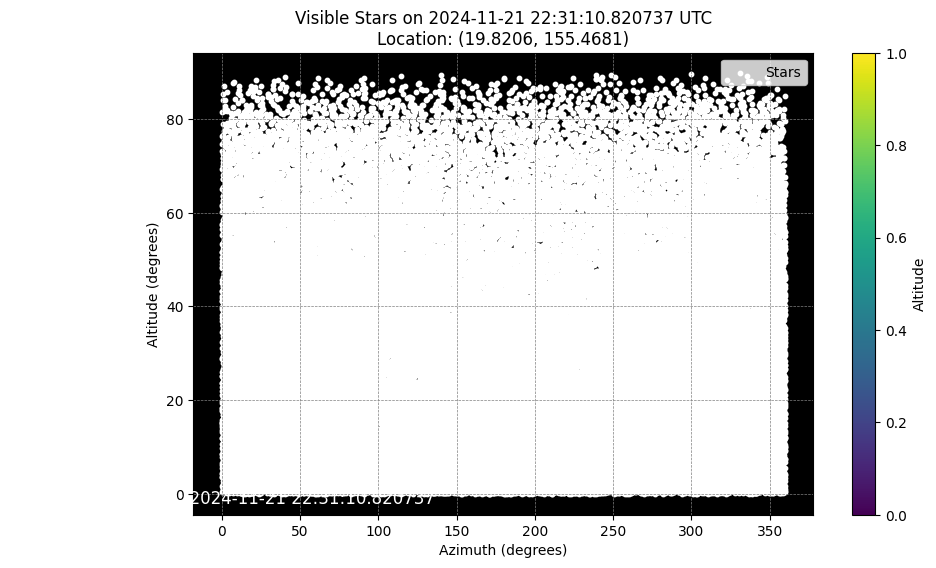

In [18]:
# Plot the stars
plt.figure(figsize=(10, 6))
plt.scatter(visible_stars_df['az'], visible_stars_df['alt'], c='white', s=10, label="Stars")
plt.gca().set_facecolor("black")
plt.colorbar(label="Altitude")
plt.xlabel("Azimuth (degrees)")
plt.ylabel("Altitude (degrees)")
plt.title(f"Visible Stars on {current_time} UTC\nLocation: ({latitude}, {longitude})")
plt.legend()
plt.grid(color="gray", linestyle="--", linewidth=0.5)
plt.text(0.5, 0.95, f"Time of Observation: {current_time}", ha='center', va='top', color='white', fontsize=12)
plt.show()